#Project Name - Flipkart Customer Service Satisfaction

### Project Type       -  Classification
### Contribution       -  Individual
### Implemented by -  Siddharth Vishwakarma


#Project Summary
In this project, I analyzed Flipkart’s customer support data to understand what drives customer satisfaction (CSAT) and built a machine learning model to predict CSAT scores. I started with an in-depth exploratory data analysis (EDA), examining how customers interact with support, the types of issues they face, and how quickly their concerns are addressed. One key finding was that most interactions were initiated by customers rather than Flipkart proactively reaching out—especially through voice calls and chat, while email was rarely used.

Through visual analytics, I identified patterns in complaint categories, with payment and refund-related issues standing out as major reasons for dissatisfaction. Using these insights, I engineered relevant features and trained a Decision Tree Classifier to predict CSAT scores. To fine-tune the model, I applied RandomizedSearchCV, optimizing its accuracy while maintaining a balanced F1 score.

Based on the analysis, I proposed several actionable recommendations. Flipkart could improve satisfaction by proactively communicating with customers about potential issues, reducing response times, streamlining payment and refund processes, and making better use of underutilized channels like email. Personalized support based on previous interactions and stronger training programs for customer service agents—especially new hires—could also help improve customer experiences.

The project aimed to provide Flipkart with a data-driven approach to enhancing customer service operations and ultimately boosting satisfaction ratings.


#GitHub link
https://github.com/siddharth1964/Siddharth-AI-ML-

# Problem Statement
Flipkart wants to improve customer satisfaction by analyzing feedback and service interactions. This project uses machine learning to find patterns that impact CSAT scores, helping enhance support quality and efficiency.

In [ ]:
# 1. Importing the neccessary liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/AI/Customer_support_data.csv') #Reading the data file and previewing the data
data

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4


#### 1. EDA

In [ ]:
data.shape # Checking the no. of rows and columns

(85907, 20)

In [ ]:
data.info() # Checking overall information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [ ]:
data.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [ ]:
data.isnull().sum() # Checking the null values present in the columns

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [ ]:
data.duplicated().sum() # Checking the duplicate data

np.int64(0)

#### 2. Data Visualization

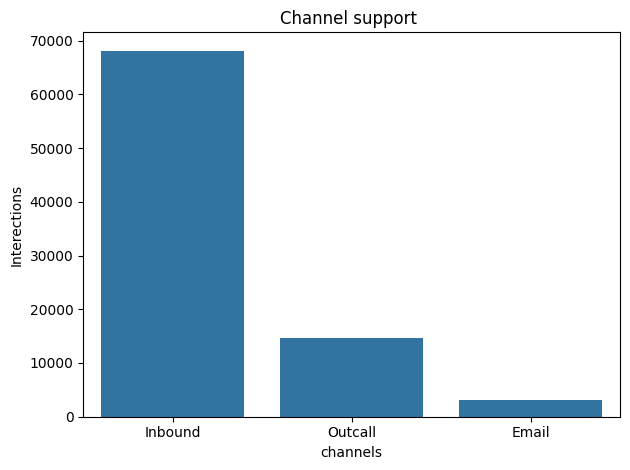

In [ ]:
sort_data = data['channel_name'].value_counts().reset_index() # it counts the no. of accurence of unique values and do their indexing
sort_data.columns = ['channel_name', 'count'] # renaming the columns

#plotting
sns.barplot(x = 'channel_name', y = 'count', data = sort_data)
plt.title('Channel support ')
plt.xlabel('channels')
plt.ylabel('Interections')
plt.tight_layout()
plt.show()

### Insights
1. the majority of interections is initiated by the customers.

2. company has minimal proactive support,for eg - if a product is delayed, or order place initially but cancelled later , untill the customer reach out to the company, company does not react into the matter.
3.Flipkart mainly waits for customers to contact them — they don’t call customers very often on their own. after a complaint, they may call to confirm resolution or provide an update (your refund is processed).
4.interection with email is very low,this might be due to customers prefer faster way to connect to the company or company do not prioritise the email as a support medium.

In [ ]:
# Converting columns 'Issue_reported at' and 'issue_responded' into datetime format to extract new feature 'response_time'
data['Issue_reported at'] = pd.to_datetime(data['Issue_reported at'], errors = 'coerce')
data['issue_responded'] = pd.to_datetime(data['issue_responded'], errors = 'coerce')
# (errors = 'coerce') it converts invalid dates to null values of the column.

# Creating new feature 'response_time' in days
data['response_time'] = (data['issue_responded'] - data['Issue_reported at']).dt.total_seconds() / (60*60*24)

# Droping the columns
data.drop(columns=['Issue_reported at', 'issue_responded'], inplace=True)

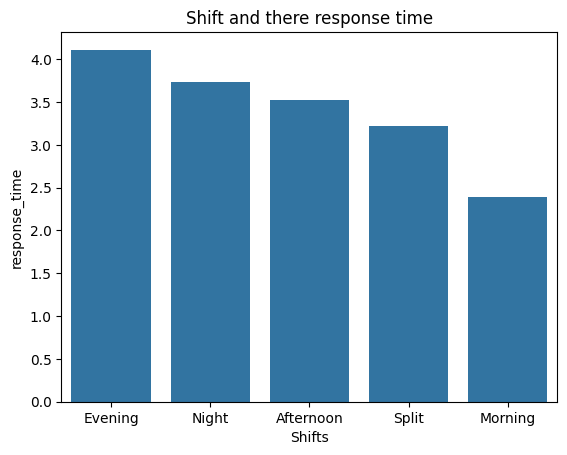

In [ ]:
#grouping data by Agent shift with there respective average response time
grouped_data = data.groupby('Agent Shift', as_index=False)['response_time'].mean()

#Sorting the data in decreasing order according to response time so that graph looks better
grouped_data = grouped_data.sort_values('response_time', ascending=False)

#Plotting a bar plot
sns.barplot(x='Agent Shift', y='response_time', data=grouped_data)
plt.title('Shift and there response time')
plt.xlabel('Shifts')
plt.show()


### Insights
1. Response time of the morning shift is faster as compared to other shifts.
2. Response time of the evening shift is Slowest.

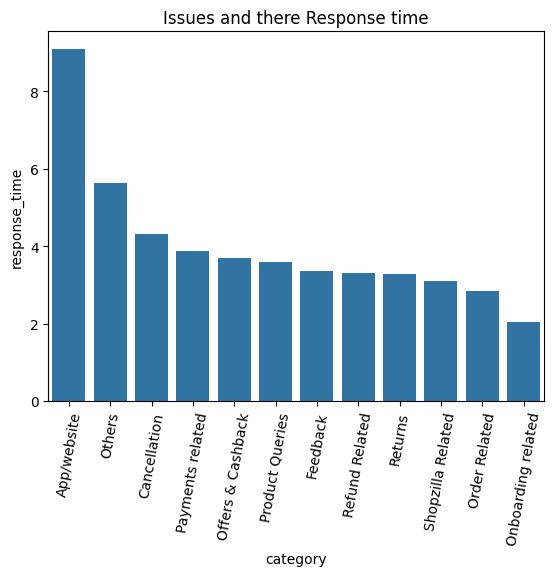

In [ ]:
#grouping data by category with there respective average response time
grouped_data = data.groupby('category')['response_time'].mean().reset_index()

grouped_data.columns = ['category', 'response_time'] # Renaming the columns

#Sorting the data in decreasing order according to response time so that graph looks better
grouped_data = grouped_data.sort_values('response_time', ascending=False)

#Plotting
sns.barplot(x='category', y='response_time', data=grouped_data)
plt.title('Issues and there Response time')
plt.xticks(rotation=80)
plt.show()


### Insights
1. Response time for App/website related is too long for eg- slow response of website,not able to login etc.
2. Response time for Onboarding related issues for eg- account creation or subscription etc, is minimal.


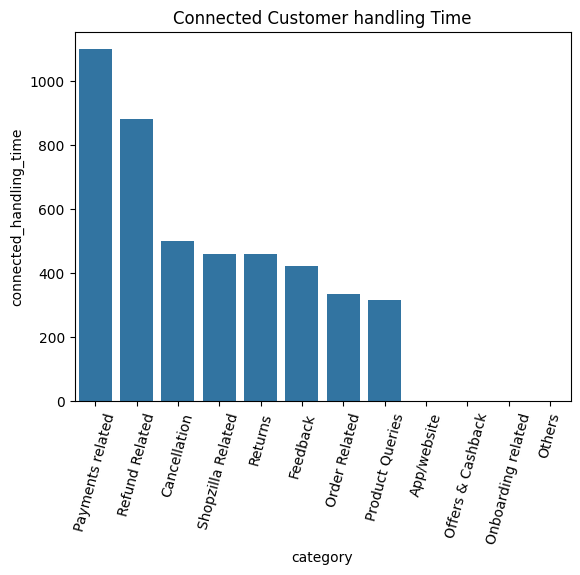

In [ ]:
#grouping data by category with there respective average connected time with customers
grouped_data = data.groupby('category')['connected_handling_time'].mean().reset_index()

grouped_data.columns = ['category', 'connected_handling_time'] # Renaming the columns

#Sorting the data in decreasing order according to response time so that graph looks better
grouped_data = grouped_data.sort_values('connected_handling_time',ascending = False)

#Plotting
sns.barplot(x='category', y='connected_handling_time', data=grouped_data)
plt.title('Connected Customer handling Time')
plt.xticks(rotation=75)
plt.show()

### Insights
1. agents take more time to satisfy the customers in payments and Refund related issues.

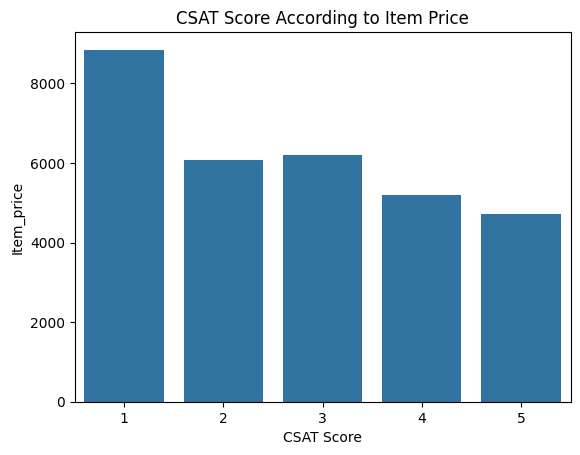

In [ ]:
#grouping data by CSAT Score with there respective average Item price
grouped_data = data.groupby('CSAT Score')['Item_price'].mean().reset_index()

grouped_data.columns = ['CSAT Score', 'Item_price'] # Renaming the columns

#Sorting the data in decreasing order according to Item price so that graph looks better
grouped_data.sort_values('Item_price', ascending = False)

sns.barplot(x = 'CSAT Score', y = 'Item_price', data=grouped_data)
plt.title('CSAT Score According to Item Price')
plt.show()

### Insights
1. customer is not satisfy with the service in the matter of higher valued product.

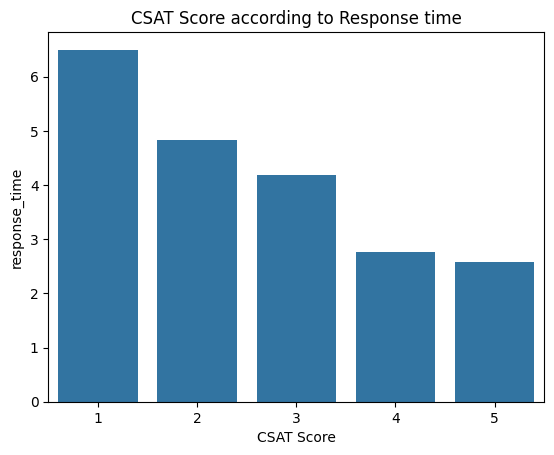

In [ ]:
#grouping data by CSAT Score with there respective average Response time
grouped_data = data.groupby('CSAT Score')['response_time'].mean().reset_index()

grouped_data.columns = ['CSAT Score', 'response_time'] # Renaming the columns

#Sorting the data in decreasing order according to Response time so that graph looks better
grouped_data.sort_values('response_time', ascending = False)

sns.barplot(x = 'CSAT Score', y = 'response_time', data = grouped_data)
plt.title('CSAT Score according to Response time')
plt.show()

### Insights
1. Customer is not satisfied with the company's response time  

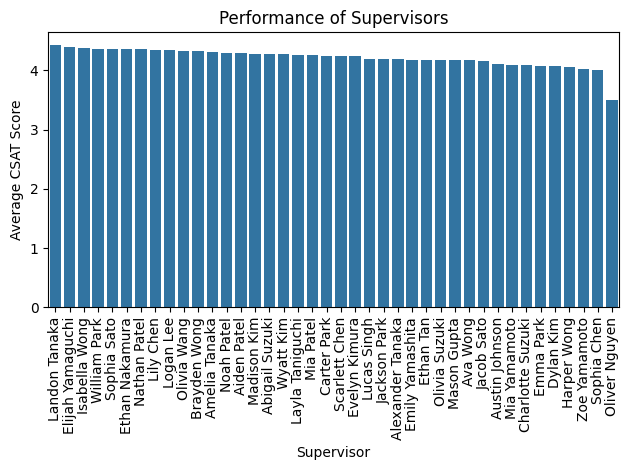

In [ ]:
#grouping data by Supervisors with there respective average CSAT Scores
grouped_data = data.groupby('Supervisor')['CSAT Score'].mean().reset_index()

grouped_data.columns = ['Supervisor','CSAT Score'] # Renaming the columns

#Sorting the data in decreasing order according to CSAT Score so that graph looks better
grouped_data = grouped_data.sort_values('CSAT Score', ascending=False)

#Plotting
sns.barplot(x = 'Supervisor', y = 'CSAT Score', data = grouped_data)
plt.title('Performance of Supervisors')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=90) # it will rotate the Names in the x axis so that it won't be overlaped
plt.tight_layout()
plt.show()

### Insights
1. performance of Landon Tanaka as a supervisor is better amongst all
2. performance of Oliver Nguyen in not satisfactional.

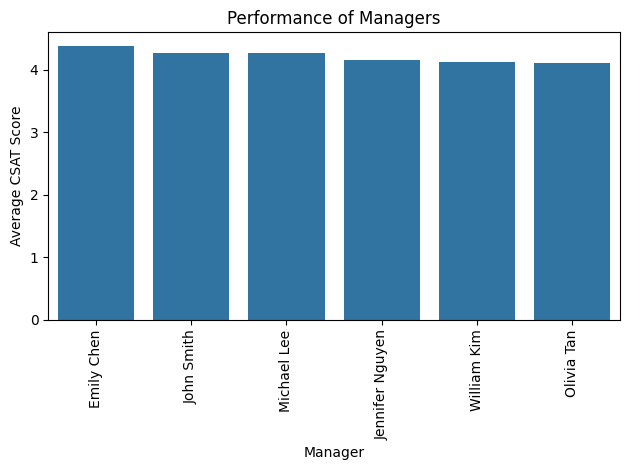

In [ ]:
#grouping data by Managers with there respective average CSAT Scores
grouped_data = data.groupby('Manager')['CSAT Score'].mean().reset_index()

grouped_data.columns = ['Manager','CSAT Score'] # Renaming the columns

#Sorting the data in decreasing order according to CSAT Score so that graph looks better
grouped_data = grouped_data.sort_values('CSAT Score', ascending=False)

#Plotting
sns.barplot(x = 'Manager', y = 'CSAT Score', data = grouped_data)
plt.title('Performance of Managers')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=90)# it will rotate the Names in the x axis so that it won't be overlaped
plt.tight_layout()
plt.show()


### Insights
1. Performance of Emily Chen is better amongst all and Oivia Tan is not performing well

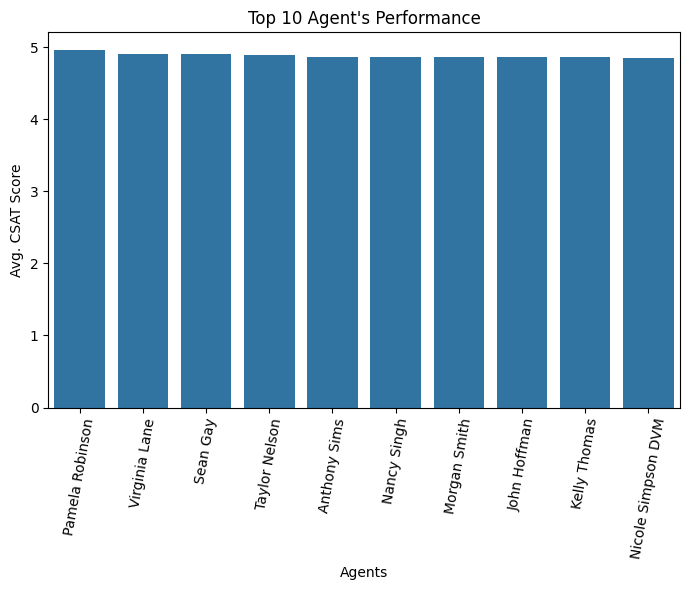

In [ ]:
#grouping data by Agents with there respective average CSAT Scores
grouped_data = data.groupby('Agent_name')['CSAT Score'].mean().reset_index()
grouped_data.columns = ['Agent_name', 'CSAT Score'] # Renaming the columns

#Sorting the data in decreasing order according to CSAT Score so that graph looks better
grouped_data = grouped_data.sort_values('CSAT Score', ascending = False)

top_10 = grouped_data.head(10).reset_index(drop=True) # Selecting top 10 records and indexing it from 0

plt.figure(figsize=(7,6)) # Describing plot size

# Plotting
sns.barplot(x='Agent_name', y='CSAT Score', data=top_10)
plt.title("Top 10 Agent's Performance")
plt.xticks(rotation=80)
plt.xlabel('Agents')
plt.ylabel('Avg. CSAT Score')

plt.tight_layout()
plt.show()


### Insights
1. Performance of Pamela Robinson as an Agent is better amongst all.

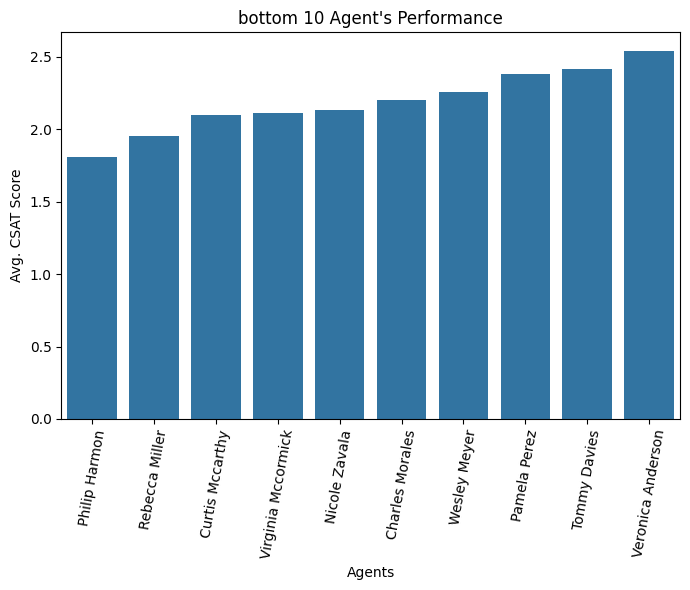

In [ ]:
#grouping data by Agents with there respective average CSAT Scores
grouped_data = data.groupby('Agent_name')['CSAT Score'].mean().reset_index()
grouped_data.columns = ['Agent_name', 'CSAT Score'] # Renaming the columns

#Sorting the data in decreasing order according to CSAT Score so that graph looks better
grouped_data = grouped_data.sort_values('CSAT Score')

bottom_10 = grouped_data.head(10).reset_index(drop=True) # Selecting bottom 10 records and indexing it from 0

# Plotting
plt.figure(figsize=(7,6))
sns.barplot(x='Agent_name', y='CSAT Score', data = bottom_10)
plt.title("bottom 10 Agent's Performance")
plt.xticks(rotation=80)
plt.xlabel('Agents')
plt.ylabel('Avg. CSAT Score')

plt.tight_layout()
plt.show()


### Insights
1. Performance of Philip Harmon as an Agent is not satisfactional.

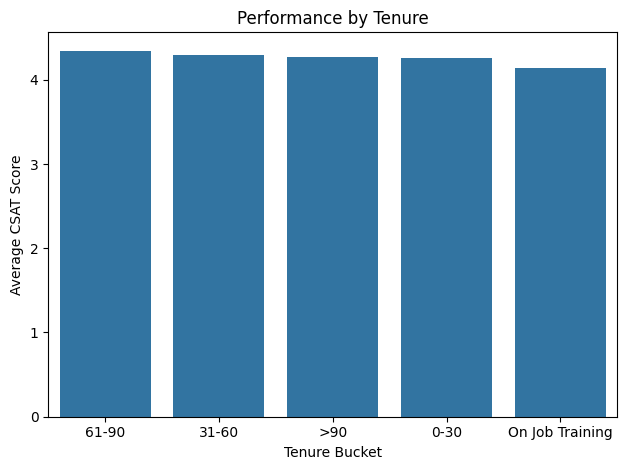

In [ ]:
#grouping data by Tenure with there respective average CSAT Scores
grouped_data = data.groupby('Tenure Bucket')['CSAT Score'].mean().reset_index()

grouped_data.columns = ['Tenure Bucket','CSAT Score'] # Renaming the columns

#Sorting the data in decreasing order according to CSAT Score so that graph looks better
grouped_data = grouped_data.sort_values('CSAT Score', ascending=False)

#Plotting
sns.barplot(x = 'Tenure Bucket', y = 'CSAT Score', data = grouped_data)
plt.title('Performance by Tenure')
plt.ylabel('Average CSAT Score')
plt.tight_layout()
plt.show()

### Insights
1. The persons who are on job Training are not performing well.

# Data-Driven Recommendations

#### 1.Implement a proactive customer service strategy by tracking order progress and reaching out to customers regarding potential             issues, rather than waiting for customer complaints.

#### 2. Reduce response times to prevent low customer ratings and enhance overall customer satisfaction.

#### 3. handling payment and refund related issues is necessary to minimize customer inconvenience and improve operational effectiveness.

#### 4. Improve customer satisfaction for high-value products through specialized and responsive services.

#### 5. Implement targeted training and performance improvement plans for supervisors and agents specifically for trainees.


# Data preprocessing and Feature selection

In [ ]:
data.head(1)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,response_time
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0.023611


In [ ]:
data.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Survey_response_Date,0
Customer_City,68828
Product_category,68711


In [ ]:
# Dropping the columns which have higher null values
data.drop(columns = ['Customer Remarks','order_date_time','order_date_time','Customer_City',
                     'Product_category','Item_price','connected_handling_time','response_time'], inplace=True)

In [ ]:
# Dropping unique columns
data.drop(columns = ['Unique id','Order_id','Agent_name','Supervisor','Manager'],inplace=True)

In [ ]:
data.drop(columns = ['Survey_response_Date'], inplace=True)

In [ ]:
data.isnull().sum() #Checking null values

,0
channel_name,0
category,0
Sub-category,0
Tenure Bucket,0
Agent Shift,0
CSAT Score,0


In [ ]:
data = data.rename(columns = {'Tenure Bucket':'tensure_bucket','Agent Shift':'agent_shift','CSAT Score':'csat_score'})

# Encoding

In [ ]:
# Using One-hot encoding because there is no order or hierarchy present in the column
df1 = pd.get_dummies(data['channel_name'], prefix = 'channel_name', dtype = int, drop_first = True)
data = pd.concat([data,df1], axis = 1). drop(['channel_name'], axis = 1)

In [ ]:
data['category'].value_counts()

,count
category,
Returns,44097
Order Related,23215
Refund Related,4550
Product Queries,3692
Shopzilla Related,2792
Payments related,2327
Feedback,2294
Cancellation,2212
Offers & Cashback,480


In [ ]:
# Using One-hot encoding because there is no order or hierarchy present in the column
df1 = pd.get_dummies(data['category'], prefix = 'category', dtype = int, drop_first = True)
data = pd.concat([data,df1], axis = 1). drop(['category'], axis = 1)

In [ ]:
# Using Frequency Encoding because there is a high number of elementsin category columns.
# It encodes without increasing dimensionality.
df = data['Sub-category'].value_counts().to_dict()
data['Sub-category'] = data['Sub-category'].map(df)

In [ ]:
data['tensure_bucket'].value_counts()

,count
tensure_bucket,
>90,30660
On Job Training,25523
31-60,11665
0-30,11318
61-90,6741


In [ ]:
# Doing mannual encoding because hierarchy is present in the data
tenure_map = {
    'On Job Training': 0,
    '0-30': 1,
    '31-60': 2,
    '61-90': 3,
    '>90': 4
    }

data['tensure_bucket'] = data['tensure_bucket'].map(tenure_map)


In [ ]:
data['agent_shift'].value_counts()

,count
agent_shift,
Morning,41426
Evening,33677
Afternoon,5840
Split,3648
Night,1316


In [ ]:
# Doing mannual encoding because hierarchy is present in the data
shift_map = {
    'Morning': 0,
    'Afternoon': 1,
    'Evening': 2,
    'Split': 3,
    'Night': 4
    }

data['agent_shift'] = data['agent_shift'].map(shift_map)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sub-category                 85907 non-null  int64
 1   tensure_bucket               85907 non-null  int64
 2   agent_shift                  85907 non-null  int64
 3   csat_score                   85907 non-null  int64
 4   channel_name_Inbound         85907 non-null  int64
 5   channel_name_Outcall         85907 non-null  int64
 6   category_Cancellation        85907 non-null  int64
 7   category_Feedback            85907 non-null  int64
 8   category_Offers & Cashback   85907 non-null  int64
 9   category_Onboarding related  85907 non-null  int64
 10  category_Order Related       85907 non-null  int64
 11  category_Others              85907 non-null  int64
 12  category_Payments related    85907 non-null  int64
 13  category_Product Queries     85907 non-null  i

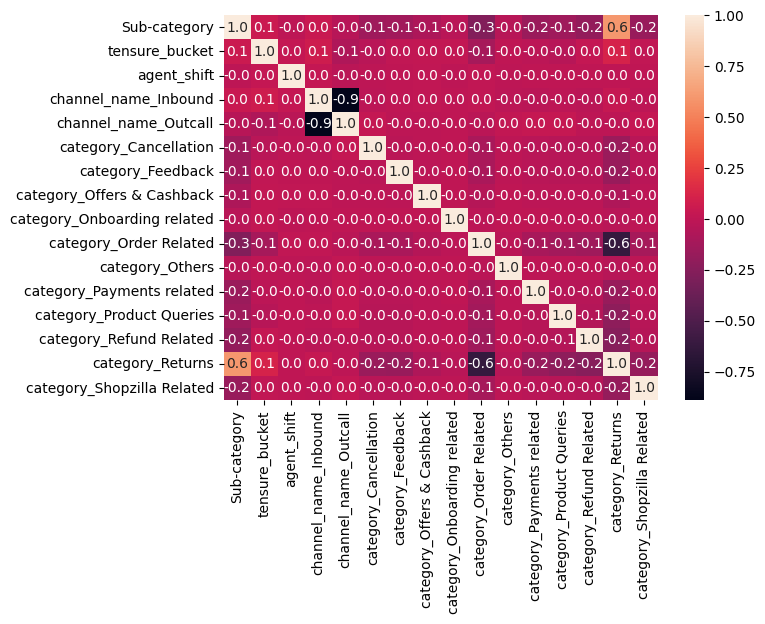

In [ ]:
# Checking high correlated columns
df = data[['Sub-category','tensure_bucket','agent_shift','channel_name_Inbound','channel_name_Outcall','category_Cancellation',
          'category_Feedback','category_Offers & Cashback','category_Onboarding related','category_Order Related','category_Others',
          'category_Payments related','category_Product Queries','category_Refund Related','category_Returns','category_Shopzilla Related']]
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(),annot=True,fmt=".1f")
plt.show()

# Scaling

In [ ]:
data['Sub-category']

,Sub-category
0,23
1,3589
2,4116
3,22389
4,1920
...,...
85902,2665
85903,1059
85904,6922
85905,2294


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

data['Sub-category'] = scale.fit_transform(data['Sub-category'].values.reshape(-1, 1))

In [ ]:
data.head()

,Sub-category,tensure_bucket,agent_shift,csat_score,channel_name_Inbound,channel_name_Outcall,category_Cancellation,category_Feedback,category_Offers & Cashback,category_Onboarding related,category_Order Related,category_Others,category_Payments related,category_Product Queries,category_Refund Related,category_Returns,category_Shopzilla Related
0,0.000983,0,0,5,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0.160264,4,0,5,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0.183804,0,2,5,1,0,0,0,0,0,1,0,0,0,0,0,0
3,1.000000,4,2,5,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0.085716,1,0,5,1,0,1,0,0,0,0,0,0,0,0,0,0


# Model Creation

In [ ]:
# Defining input variables and output
# we don't take 'channel_name_Outcall' becasuse it is highly co-related with 'channel_name_Inbound'
x = data.loc[:,['Sub-category', 'tensure_bucket', 'agent_shift',
       'channel_name_Inbound', 'category_Cancellation',
       'category_Feedback', 'category_Offers & Cashback',
       'category_Onboarding related', 'category_Order Related',
       'category_Others', 'category_Payments related',
       'category_Product Queries', 'category_Refund Related',
       'category_Returns', 'category_Shopzilla Related']]

y = data.csat_score

In [ ]:
# Creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, stratify=y, random_state = 42)

In [ ]:
print('x_train-:',len(x_train))
print('y_train-:',len(y_train))
print('x_test-:',len(x_test))
print('y_test-:',len(y_test))

x_train-: 64430
y_train-: 64430
x_test-: 21477
y_test-: 21477


In [ ]:
# Using decision tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predicting output for x_test

y_pred = dt.predict(x_test)
y_pred

array([5, 5, 5, ..., 5, 5, 5])

# Evaluating the model

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
acc

0.689574894072729

# Hyperparameter tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Define the hyperparameters and their values randomly
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

# Creating the Decision Tree Classifier model
tree_clf = DecisionTreeClassifier(random_state=3)

random_search = RandomizedSearchCV(
    estimator=tree_clf,
    param_distributions=params,
    n_iter=30,
    scoring='f1_macro',
    n_jobs=-1,
    cv=3,
    verbose=1,
    random_state=42
    )
# Fiting the model on the training data
random_search.fit(x_train, y_train)

print("Best parameters:", random_search.best_params_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'gini'}


In [ ]:
random_search.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 15,
 'criterion': 'gini'}

In [ ]:
# Initialize DecisionTreeClassifier with specified hyperparameters
df1 = DecisionTreeClassifier(criterion = 'gini', max_depth= 15, min_samples_leaf= 1, min_samples_split=2, splitter= 'best')

In [ ]:
# Training the model

df1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15)

In [ ]:
# Making prediction on test data
y_pred = df1.predict(x_test)
y_pred

array([5, 5, 5, ..., 5, 5, 5])

# Evaluating the model

In [ ]:
test_acc = accuracy_score(y_test,y_pred)
test_acc

0.6899008241374494